<a href="https://colab.research.google.com/github/tokaalaa/DM_Course/blob/main/Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Read data

In [ ]:
data_path = '/content/drive/MyDrive/Assignment_3_DM/Data/wdbc.data' 
names_path = '/content/drive/MyDrive/Assignment_3_DM/Data/wdbc.names'
with open(names_path, 'r') as f:
    names = f.read()
print(names)

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

In [ ]:
attr_names = ['Id', 'diagnosis']
for i in range (1,31):
    attr_names.append("attr "+ str(i))

data = pd.read_csv(data_path, sep=',',names=attr_names)
print(data.shape)
data.head(30)

(569, 32)


,Id,diagnosis,attr 1,attr 2,attr 3,attr 4,attr 5,attr 6,attr 7,attr 8,attr 9,attr 10,attr 11,attr 12,attr 13,attr 14,attr 15,attr 16,attr 17,attr 18,attr 19,attr 20,attr 21,attr 22,attr 23,attr 24,attr 25,attr 26,attr 27,attr 28,attr 29,attr 30
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


# Preprocessing

## 1- create feature and label

In [ ]:
#create feature and label
Data = pd.DataFrame(data)
print(Data)
label = Data.loc[:, 'diagnosis'].replace(['B','M'], [0,1])
print(label)
print(label.shape)
label[22]
Data = Data.drop(columns=['Id', 'diagnosis'])
print(Data)

           Id diagnosis  attr 1  attr 2  ...  attr 27  attr 28  attr 29  attr 30
0      842302         M   17.99   10.38  ...   0.7119   0.2654   0.4601  0.11890
1      842517         M   20.57   17.77  ...   0.2416   0.1860   0.2750  0.08902
2    84300903         M   19.69   21.25  ...   0.4504   0.2430   0.3613  0.08758
3    84348301         M   11.42   20.38  ...   0.6869   0.2575   0.6638  0.17300
4    84358402         M   20.29   14.34  ...   0.4000   0.1625   0.2364  0.07678
..        ...       ...     ...     ...  ...      ...      ...      ...      ...
564    926424         M   21.56   22.39  ...   0.4107   0.2216   0.2060  0.07115
565    926682         M   20.13   28.25  ...   0.3215   0.1628   0.2572  0.06637
566    926954         M   16.60   28.08  ...   0.3403   0.1418   0.2218  0.07820
567    927241         M   20.60   29.33  ...   0.9387   0.2650   0.4087  0.12400
568     92751         B    7.76   24.54  ...   0.0000   0.0000   0.2871  0.07039

[569 rows x 32 columns]
0  

## 2- split to train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data, label,test_size=0.3,
                                                   random_state = 0)

print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


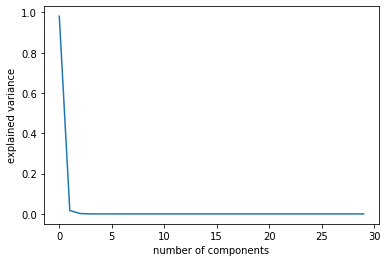

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca1 = PCA().fit(X_train)
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

##3- Scaling
by using Standard Scaler
It standardize features by removing the mean and scaling to unit variance The standard score of a sample x is calculated as:

z = (x - u) / s

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)


(398, 30)
(171, 30)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

params = { 
    'C': [1.0, 2.0, 2.5, 5.0, 10, 100, 1000]
}

model_GSCV = GridSearchCV(LogisticRegression(),scoring='accuracy', param_grid = params, cv = 10)

model_GSCV.fit(X_train, y_train)
print("best_parameters of model",model_GSCV.best_params_ )
y_pred = model_GSCV.predict(X_test)

# Model Accuracy
print("Train Accuracy: %.3f"% model_GSCV.score(X_train, y_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,target_names=['M','B']))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


best_parameters of model {'C': 5.0}
Train Accuracy: 0.952
Test Accuracy: 0.9532163742690059
[[101   7]
 [  1  62]]
              precision    recall  f1-score   support

           M       0.99      0.94      0.96       108
           B       0.90      0.98      0.94        63

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


##4- feature selection/ feature projection
Dimentionality reduction using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train = pd.DataFrame(data = X_train_pca)
X_test = pd.DataFrame(data = X_test_pca)

print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(398, 7)
(171, 7)


In [ ]:
print (pca.explained_variance_ratio_ ) #percentage of variance explained by each of the selected components

[0.43689315 0.19415163 0.09661545 0.06716611 0.0549883  0.04012257
 0.02183068]


# a. Classification model

In [ ]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
# fit the model with data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,target_names=['M','B']))

Accuracy: 0.9649122807017544
[[107   1]
 [  5  58]]
              precision    recall  f1-score   support

           M       0.96      0.99      0.97       108
           B       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



#b. Hyper-parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 
    'C': [1.0, 2.0, 2.5, 5.0, 10, 100, 1000]
}

model_GSCV = GridSearchCV(LogisticRegression(),scoring='accuracy', param_grid = params, cv = 10)

model_GSCV.fit(X_train, y_train)
print("best_parameters of model",model_GSCV.best_params_ )
y_pred = model_GSCV.predict(X_test)

# Model Accuracy
print("Train Accuracy: %.3f"% model_GSCV.score(X_train, y_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,target_names=['M','B']))

best_parameters of model {'C': 2.5}
Train Accuracy: 0.980
Test Accuracy: 0.9590643274853801
[[106   2]
 [  5  58]]
              precision    recall  f1-score   support

           M       0.95      0.98      0.97       108
           B       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



    #if {'C': 1.0}

    train score: 0.977
    Accuracy: 0.9649122807017544
    [[107   1]
    [  5  58]]
              precision    recall  f1-score   support

           M       0.96      0.99      0.97       108
           B       0.98      0.92      0.95        63

    accuracy                           0.96       171
    macro avg      0.97      0.96      0.96       171
    weighted avg   0.97      0.96      0.96       171